In [1]:
from PIL import Image

In [3]:
img = Image.open("racoon.png").convert('L')

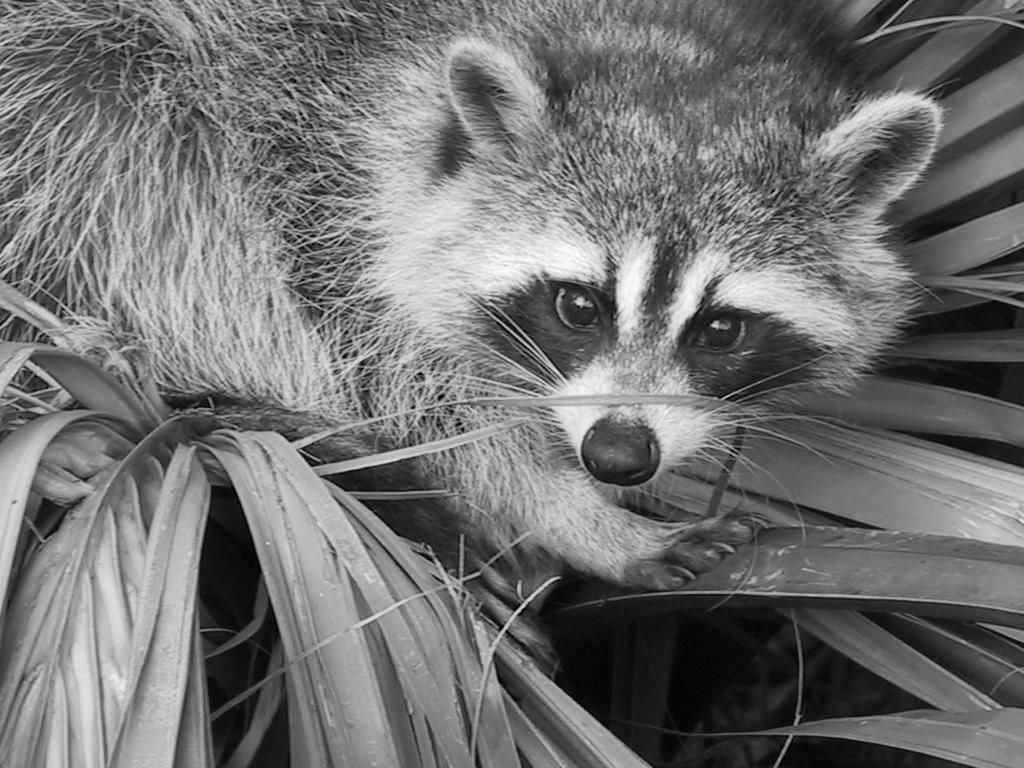

In [4]:
img

In [5]:
A = np.array(img)

In [6]:
A.shape # 대칭행렬이 아님

(768, 1024)

In [7]:
# eigenvalue decomposition을 하기 위해서는 대칭행렬이여야함

In [8]:
B = np.array(img.crop((0, 0, 768, 768))) # 이제 정방행렬이 됨

In [9]:
B = B + B.T # 대칭행렬이 됨

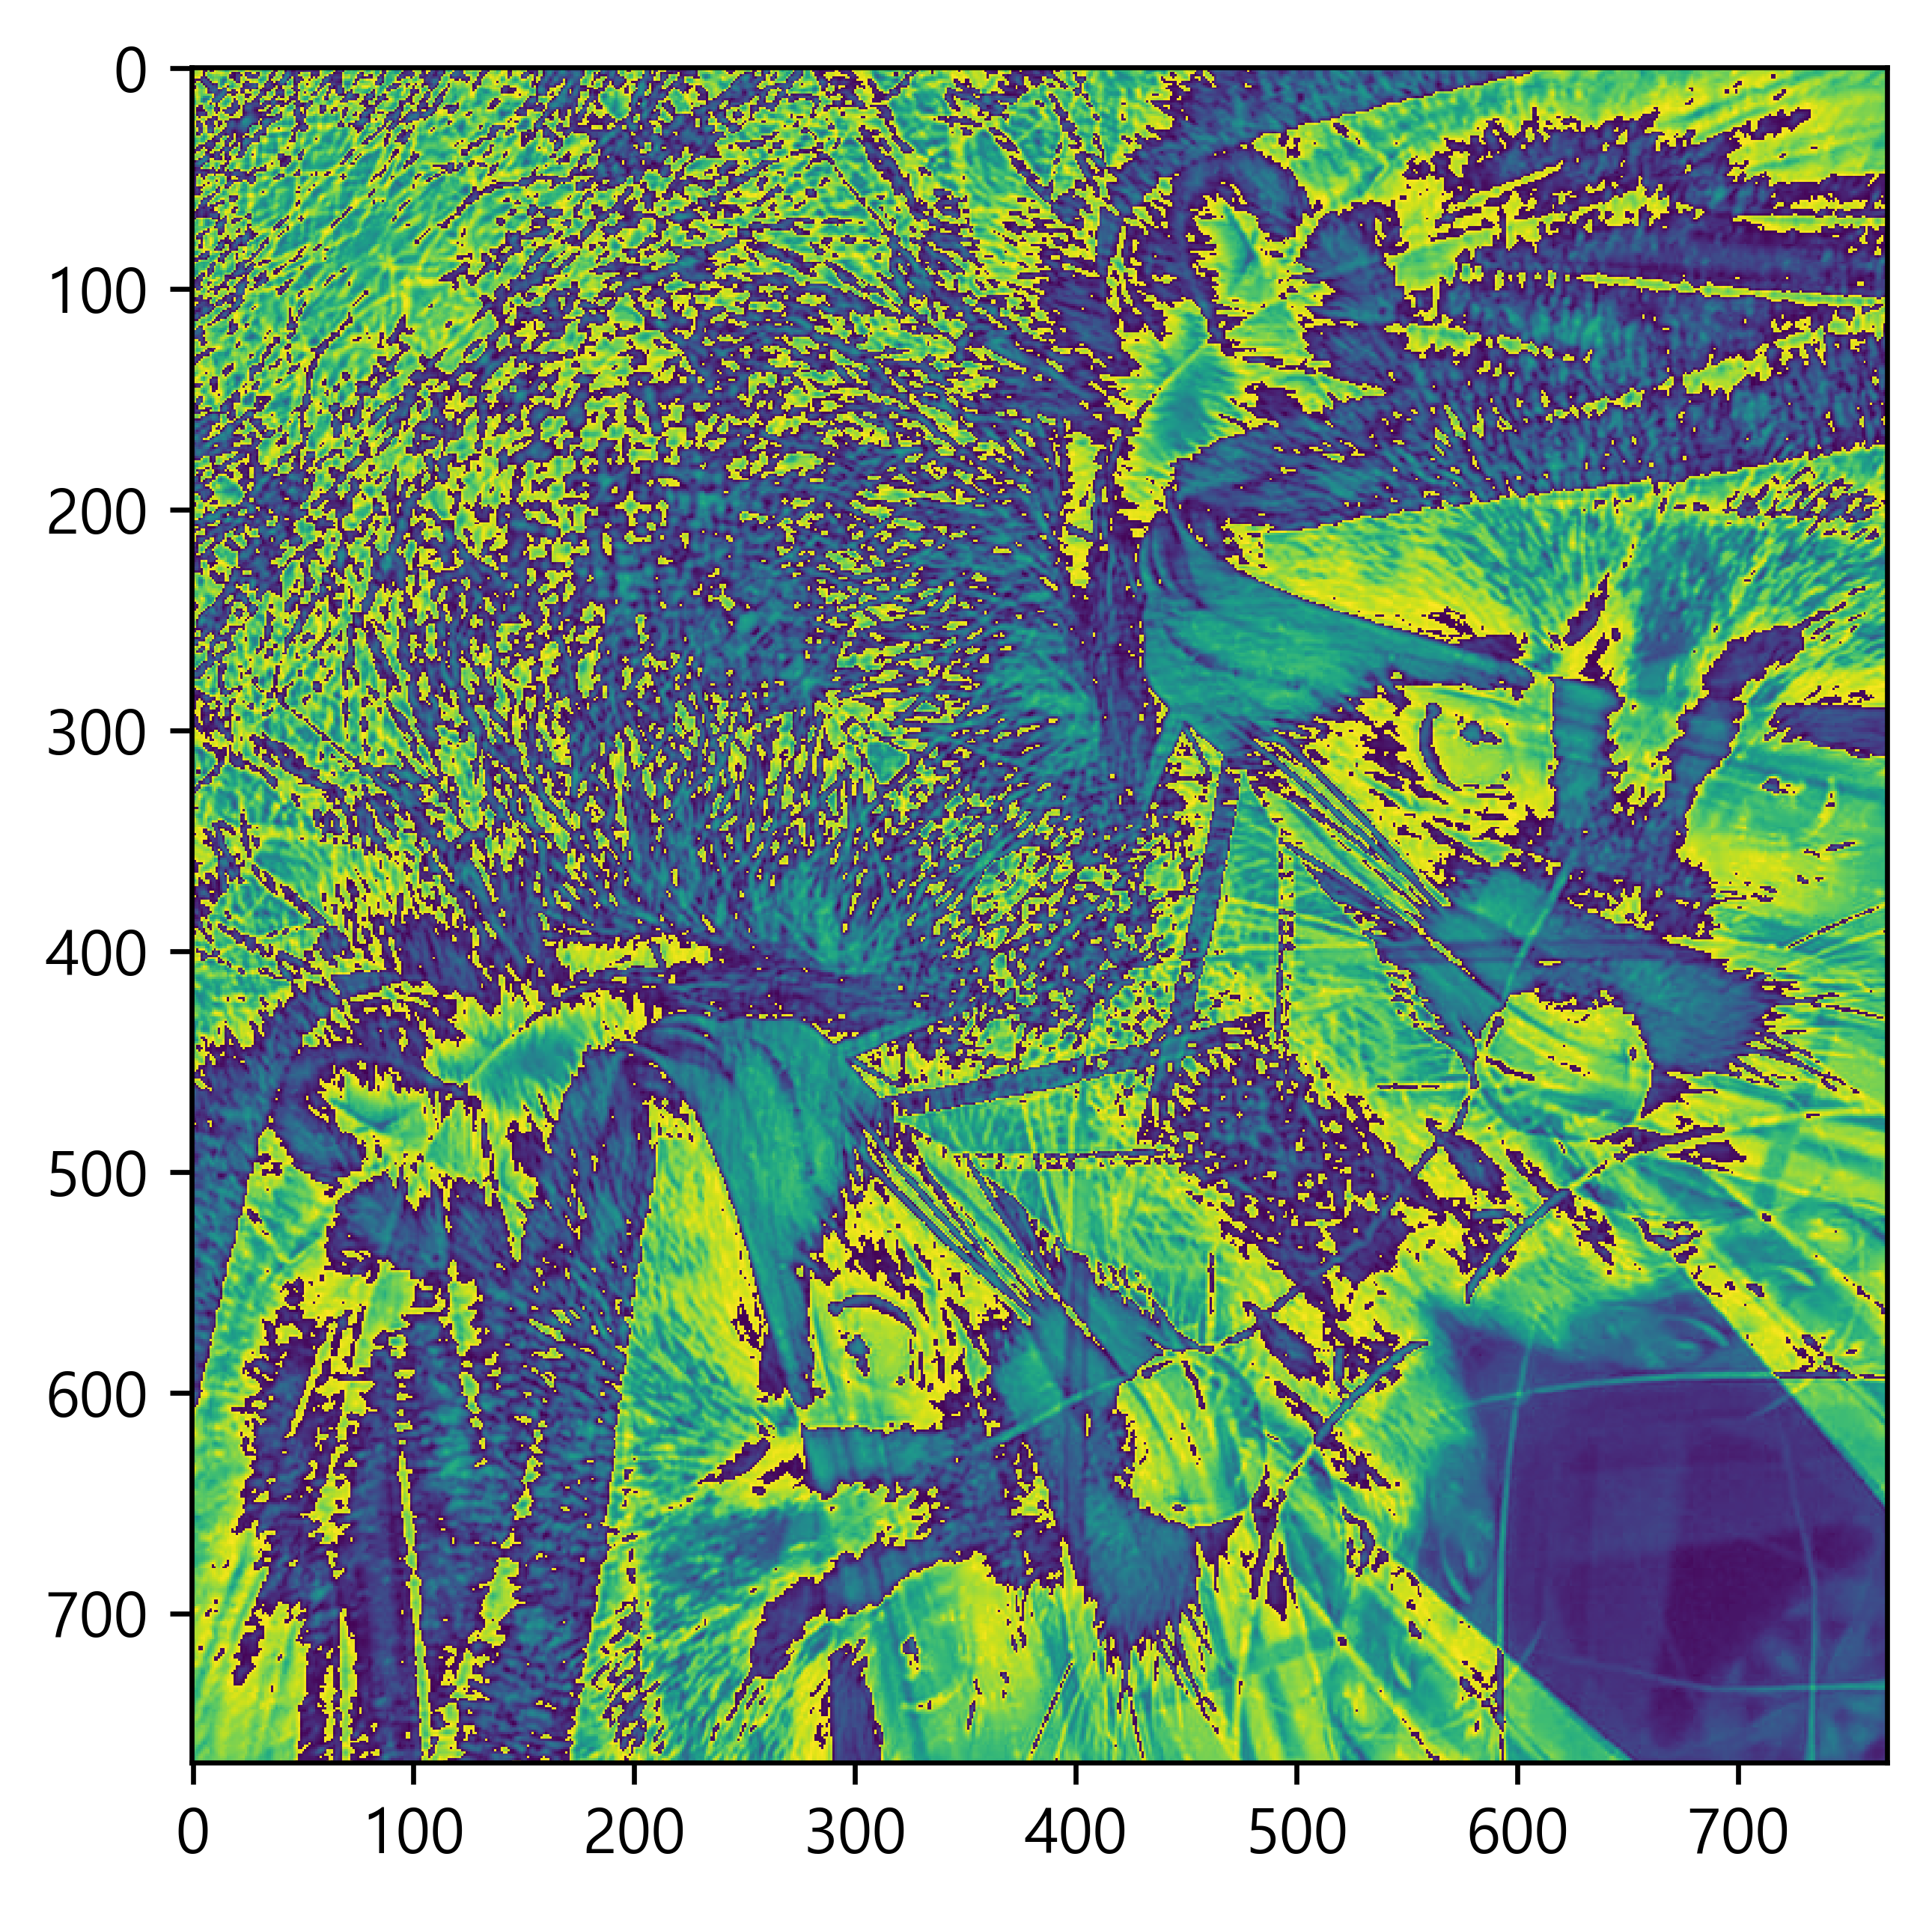

In [27]:
plt.imshow(B)
plt.grid(False)
plt.show()

In [10]:
w, V = np.linalg.eig(B)

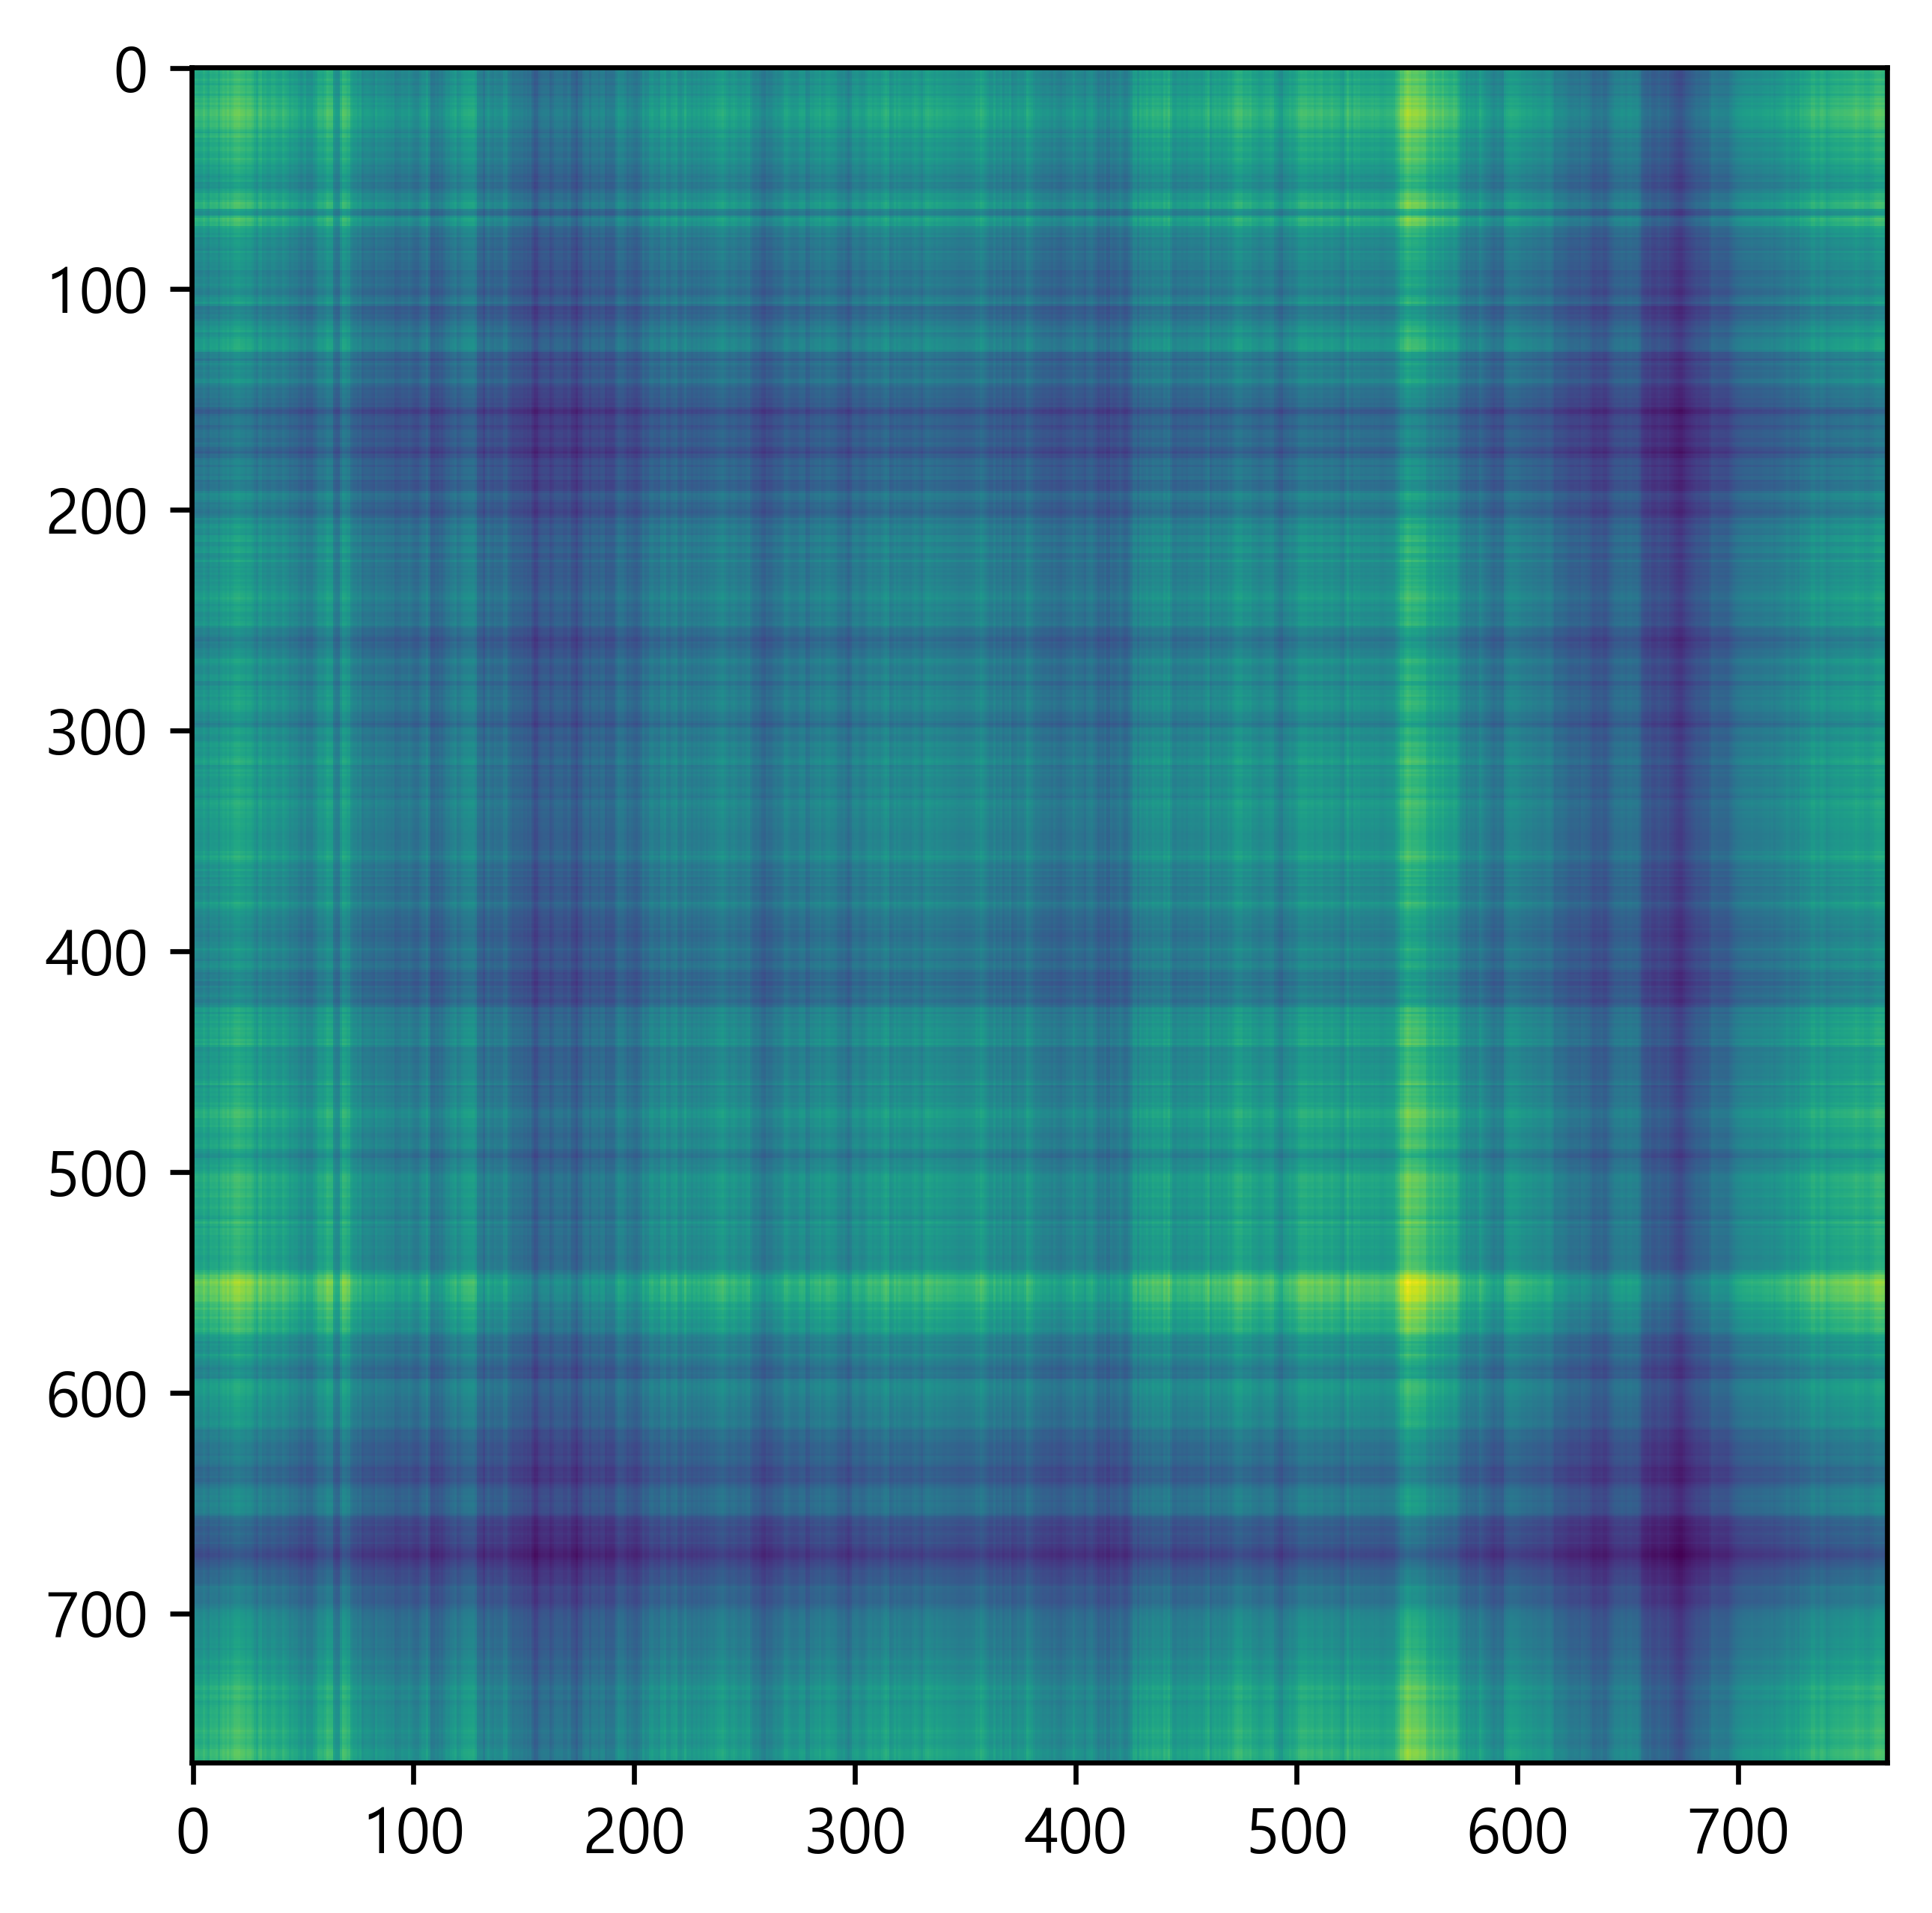

In [11]:
plt.imshow(np.real(w[0] * V[:, :1] @ V[:, :1].T)) # imaginary number가 발생해서 안 뜰 수 있기에 real 함수를 사용

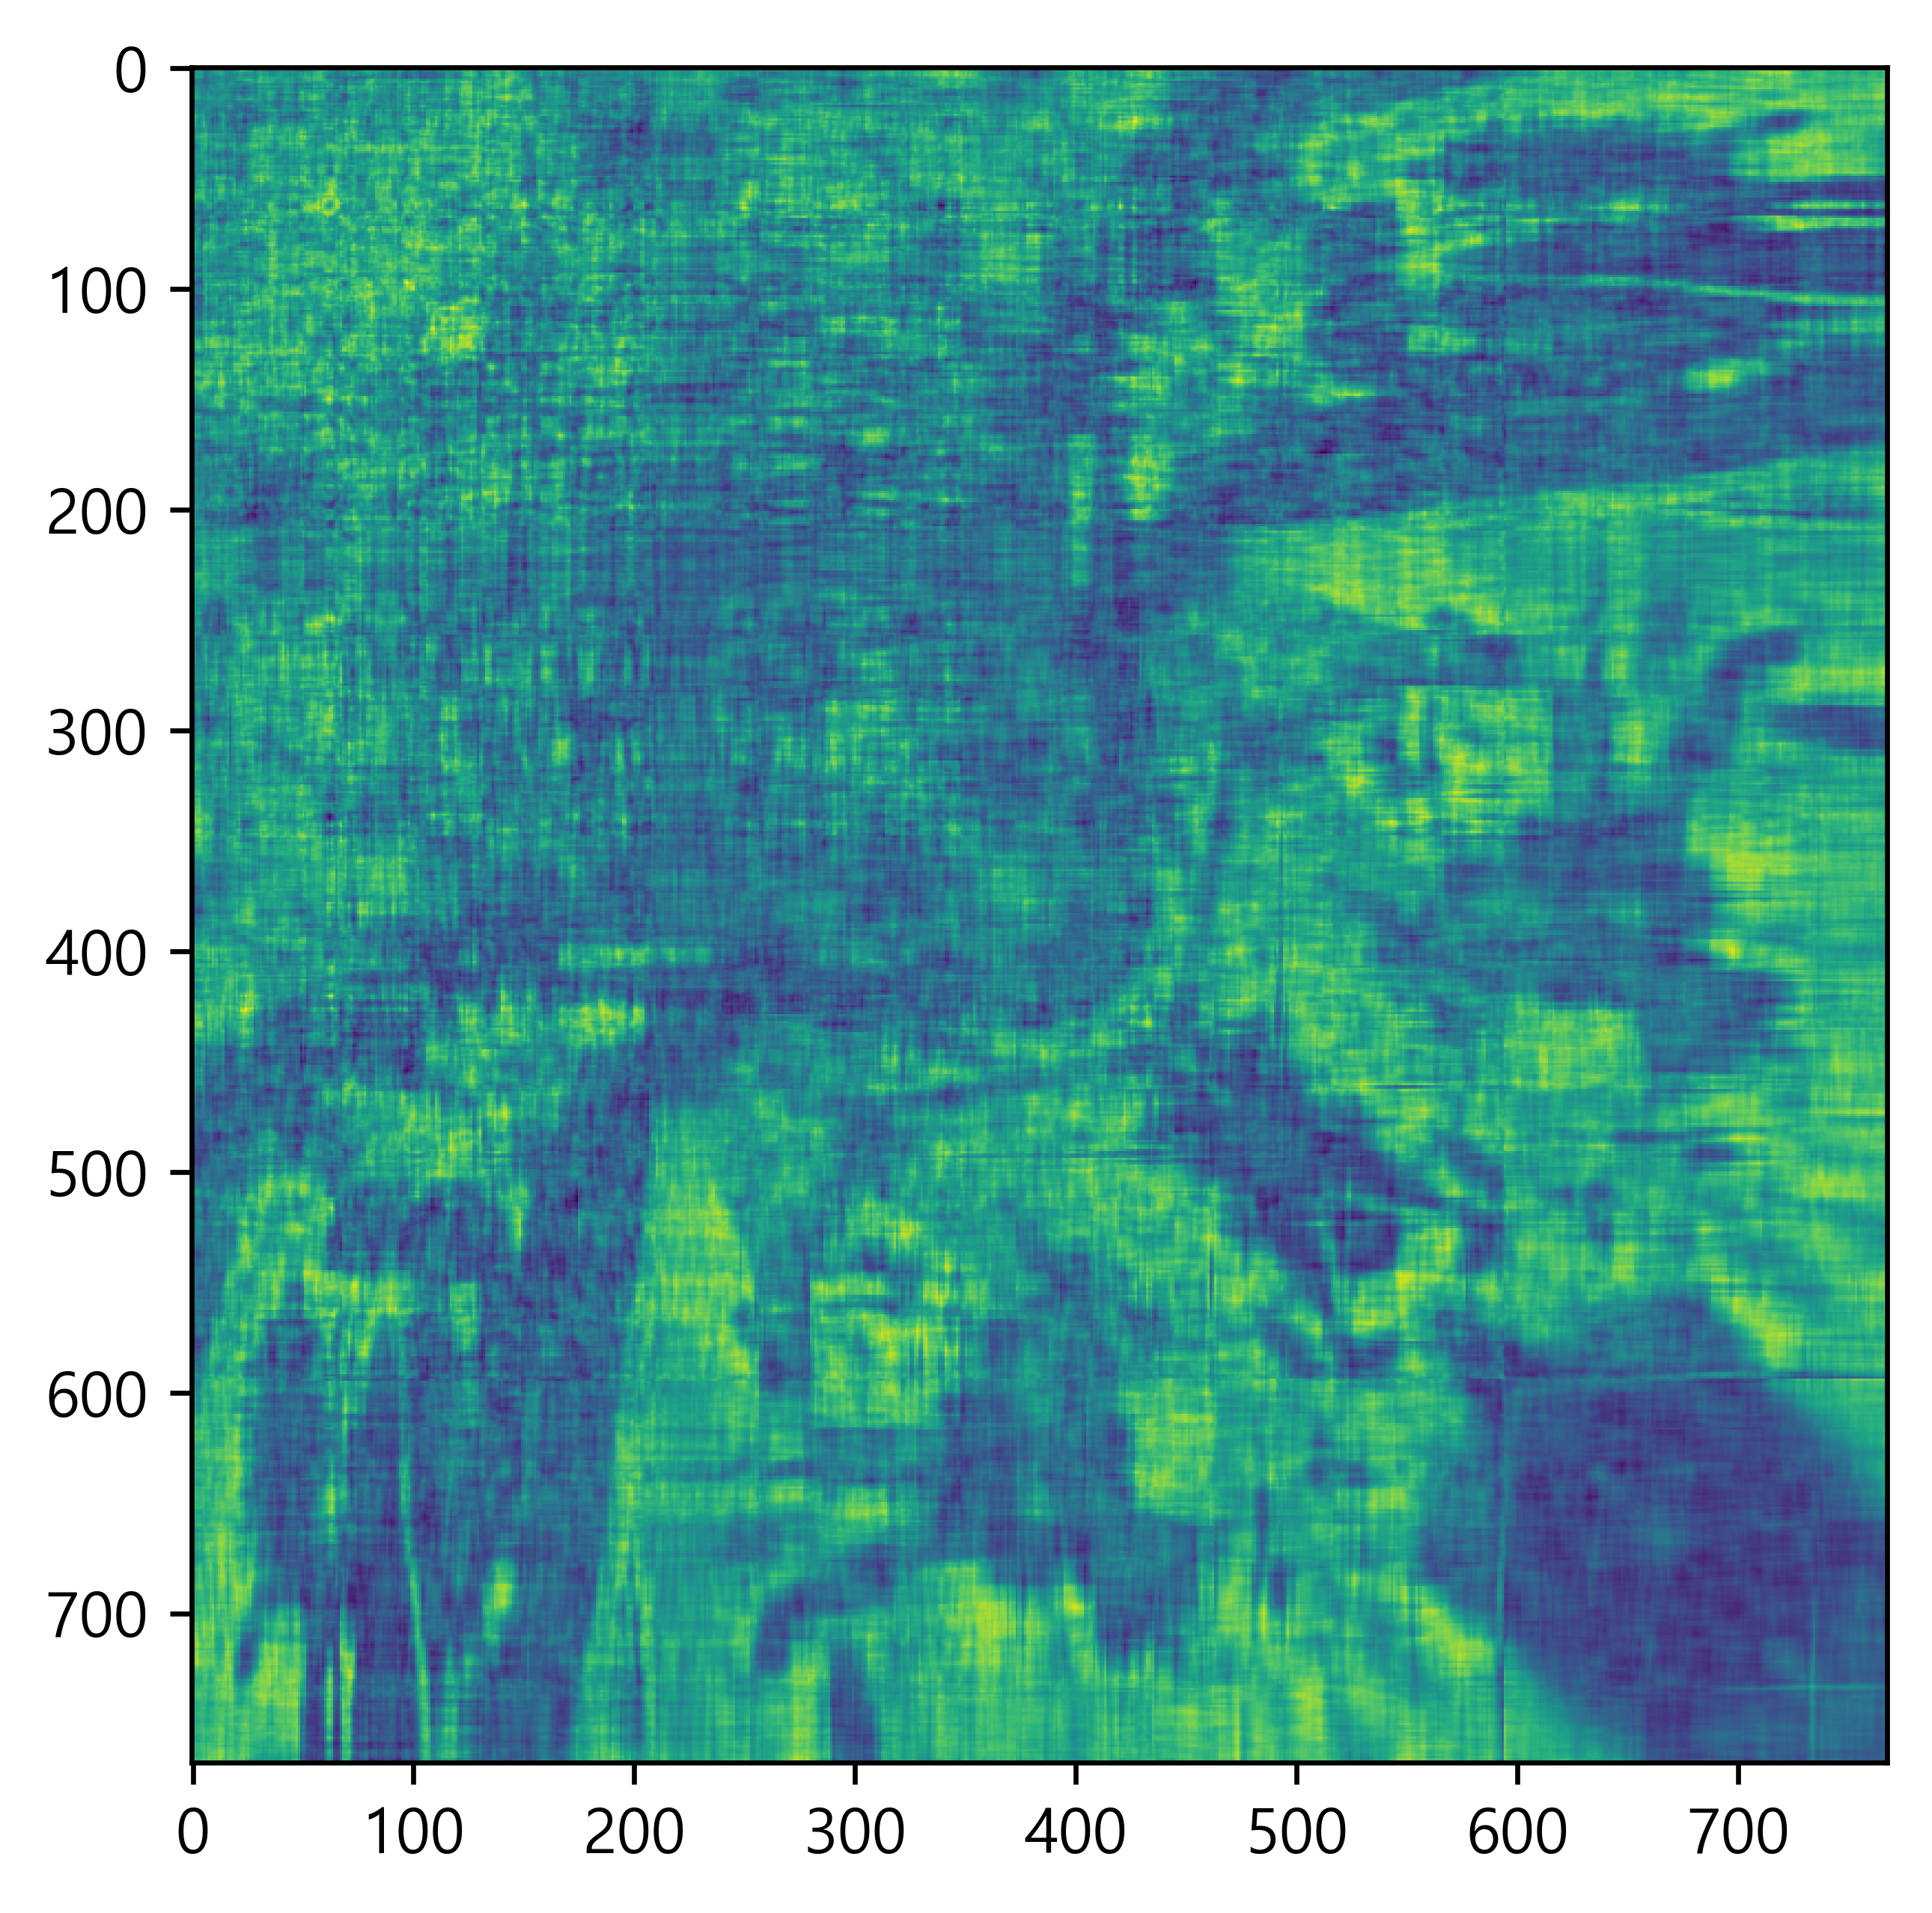

In [31]:
plt.imshow(np.real(w[0] * V[:, :1] @ V[:, :1].T +
                   w[1] * V[:, 1:2] @ V[:, 1:2].T +
                   w[2] * V[:, 2:3] @ V[:, 2:3].T +
                   w[3] * V[:, 3:4] @ V[:, 3:4].T +
                   w[4] * V[:, 4:5] @ V[:, 4:5].T +
                   w[5] * V[:, 5:6] @ V[:, 5:6].T +
                   w[6] * V[:, 6:7] @ V[:, 6:7].T +
                   w[7] * V[:, 7:8] @ V[:, 7:8].T +
                   w[8] * V[:, 8:9] @ V[:, 8:9].T +
                   w[9] * V[:, 9:10] @ V[:, 9:10].T +
                   w[10] * V[:, 10:11] @ V[:, 10:11].T +
                   w[11] * V[:, 11:12] @ V[:, 11:12].T +
                   w[12] * V[:, 12:13] @ V[:, 12:13].T +
                   w[13] * V[:, 13:14] @ V[:, 13:14].T +
                   w[14] * V[:, 14:15] @ V[:, 14:15].T +
                   w[15] * V[:, 15:16] @ V[:, 15:16].T +
                   w[16] * V[:, 16:17] @ V[:, 16:17].T +
                   w[17] * V[:, 17:18] @ V[:, 17:18].T +
                   w[18] * V[:, 18:19] @ V[:, 18:19].T +
                   w[19] * V[:, 19:20] @ V[:, 19:20].T +
                   w[20] * V[:, 20:21] @ V[:, 20:21].T +
                   w[21] * V[:, 21:22] @ V[:, 21:22].T +
                   w[22] * V[:, 22:23] @ V[:, 22:23].T                   
                  )) # more eigenvectors

In [23]:
U, S, VT = np.linalg.svd(A) # 특이분해는 대칭행렬이 아니어도 되기 때문에 바로 A 사용

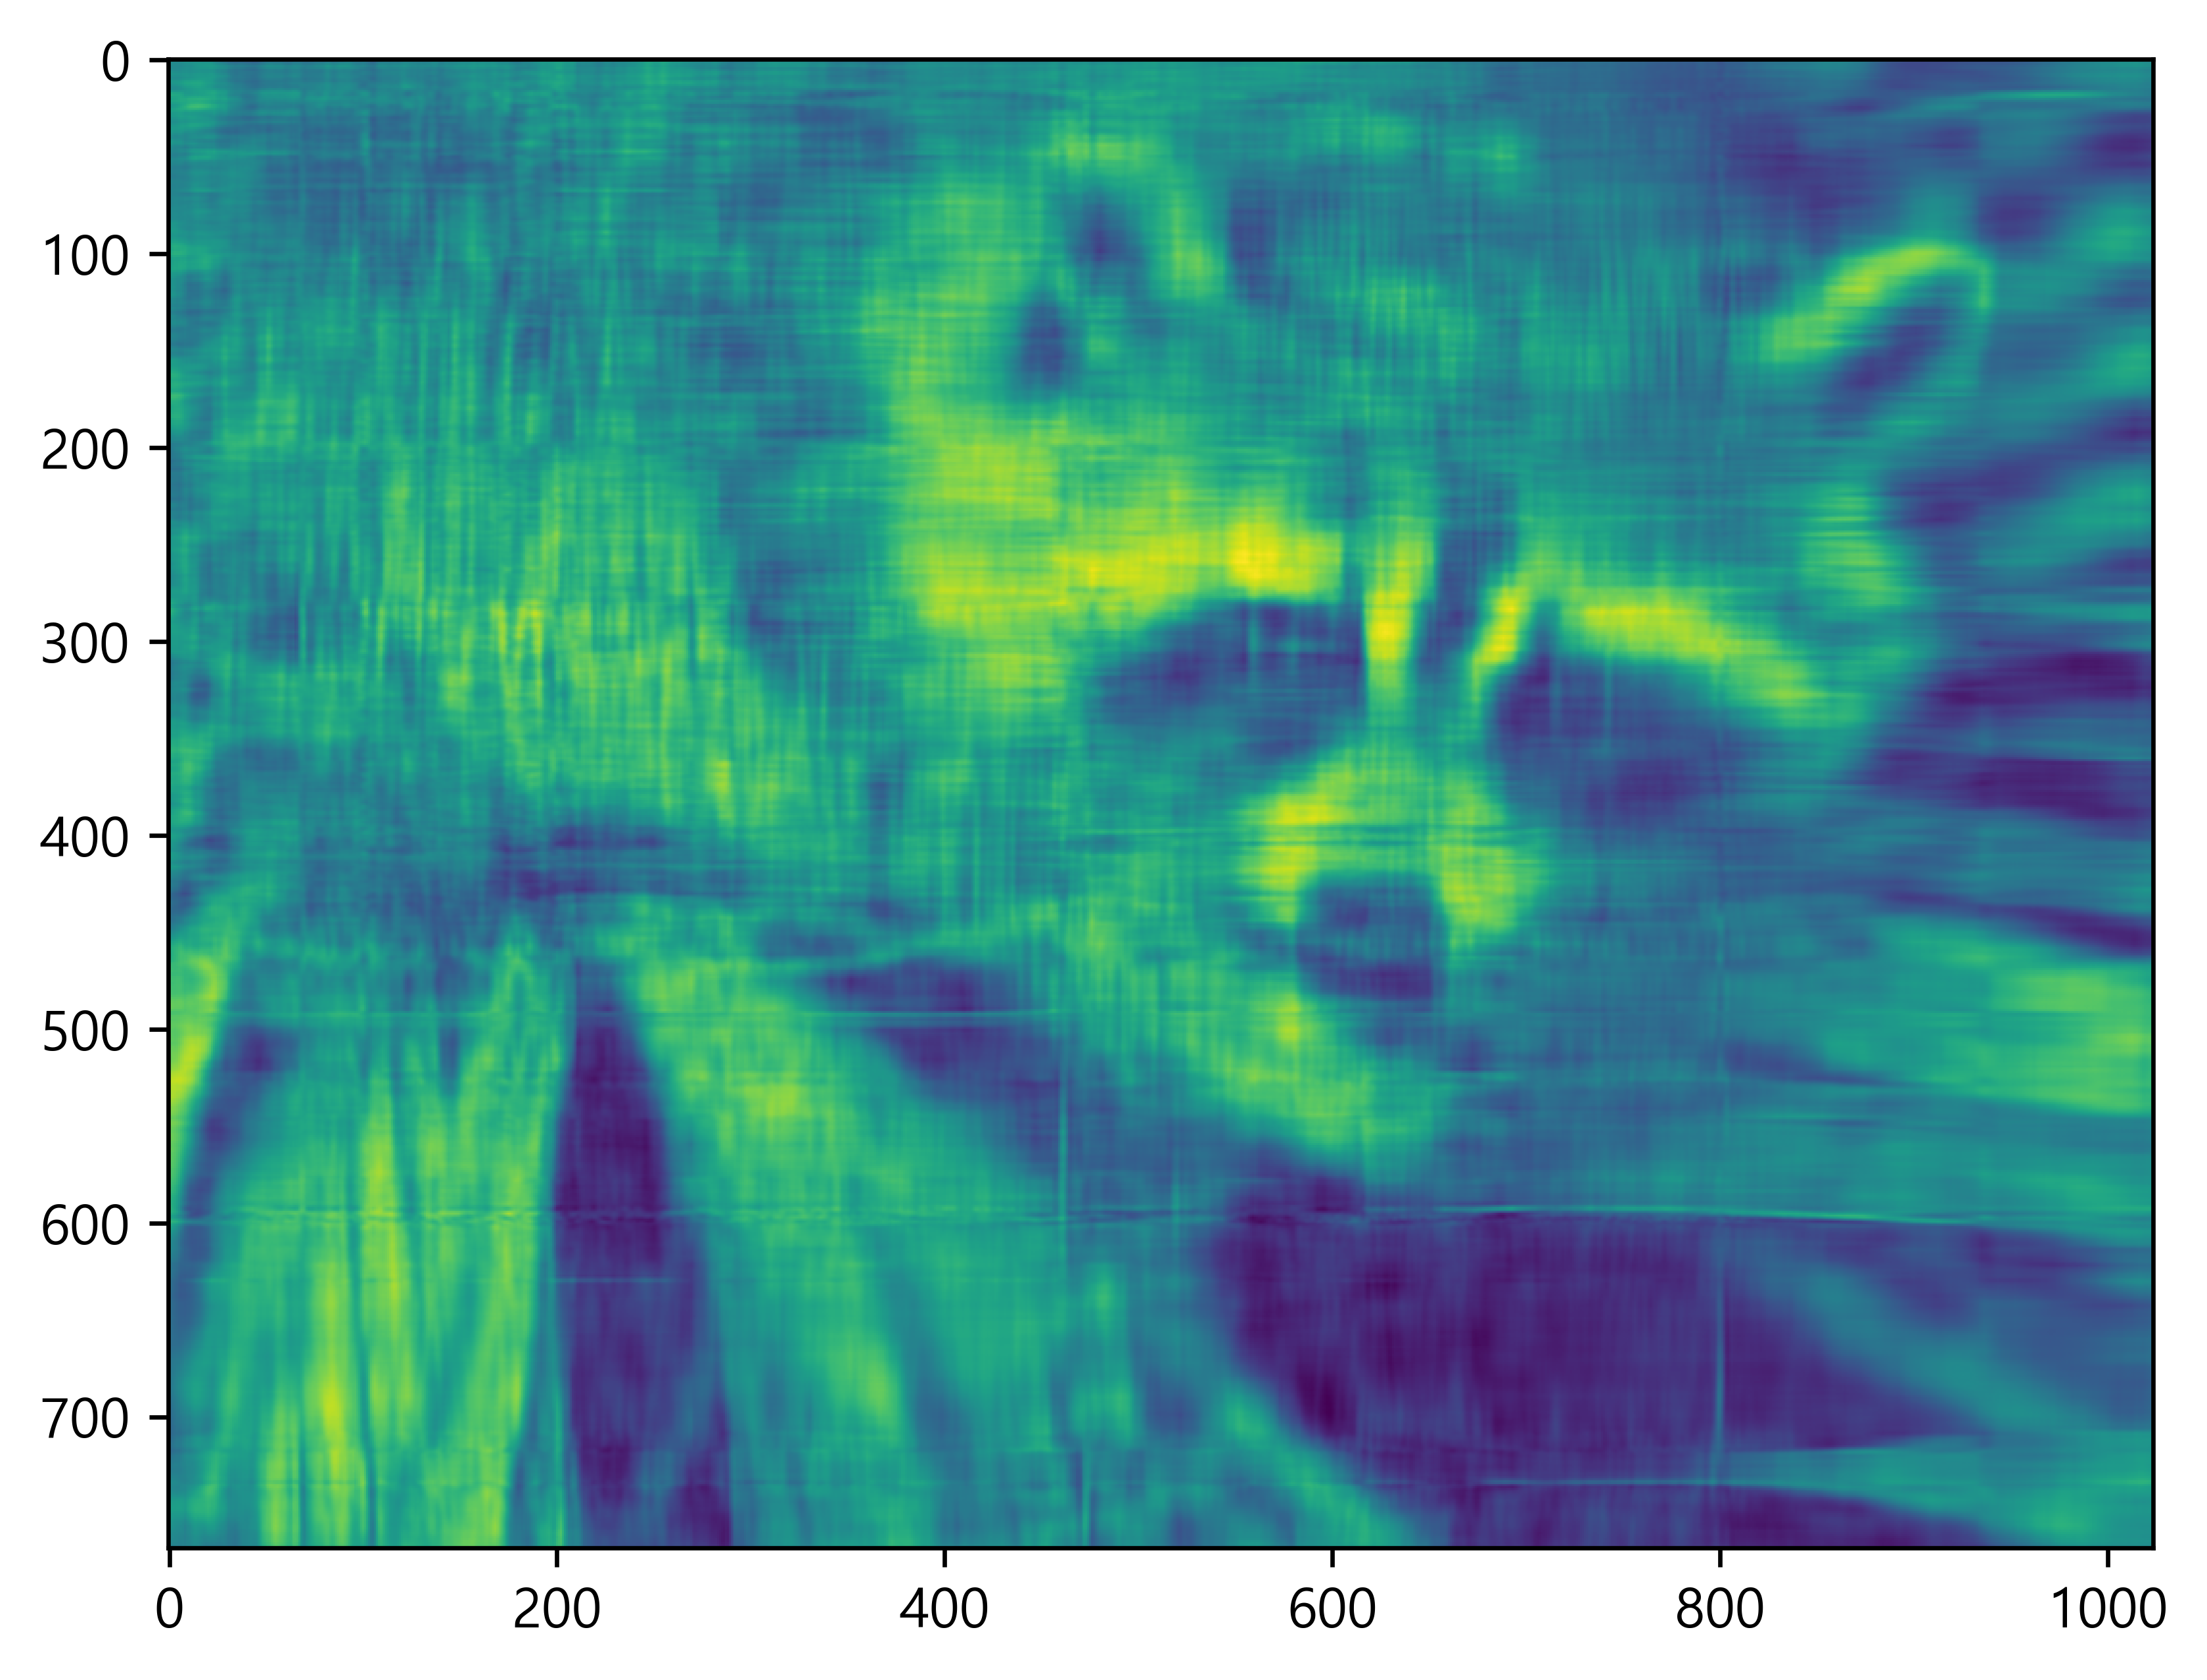

In [32]:
plt.imshow(np.real(S[0] * U[:, :1] @ VT[:1, :] +
                   S[1] * U[:, 1:2] @ VT[1:2, :] +
                   S[2] * U[:, 2:3] @ VT[2:3, :] +
                   S[3] * U[:, 3:4] @ VT[3:4, :] +
                   S[4] * U[:, 4:5] @ VT[4:5, :] +
                   S[5] * U[:, 5:6] @ VT[5:6, :] +
                   S[6] * U[:, 6:7] @ VT[6:7, :] +
                   S[7] * U[:, 7:8] @ VT[7:8, :] +
                   S[8] * U[:, 8:9] @ VT[8:9, :] +
                   S[9] * U[:, 9:10] @ VT[9:10, :] +
                   S[10] * U[:, 10:11] @ VT[10:11, :] +
                   S[11] * U[:, 11:12] @ VT[11:12, :] +
                   S[12] * U[:, 12:13] @ VT[12:13, :] +
                   S[13] * U[:, 13:14] @ VT[13:14, :] +
                   S[14] * U[:, 14:15] @ VT[14:15, :]
                  ))
plt.show()

In [29]:
7 * (1 + 578 + 587) / (578 * 587)

0.024056400794609856

매트릭스가 있을 때 중요한 정보만 뺴낸다. 그래서 그 중요한 정보만 가지고도 display가 가능함

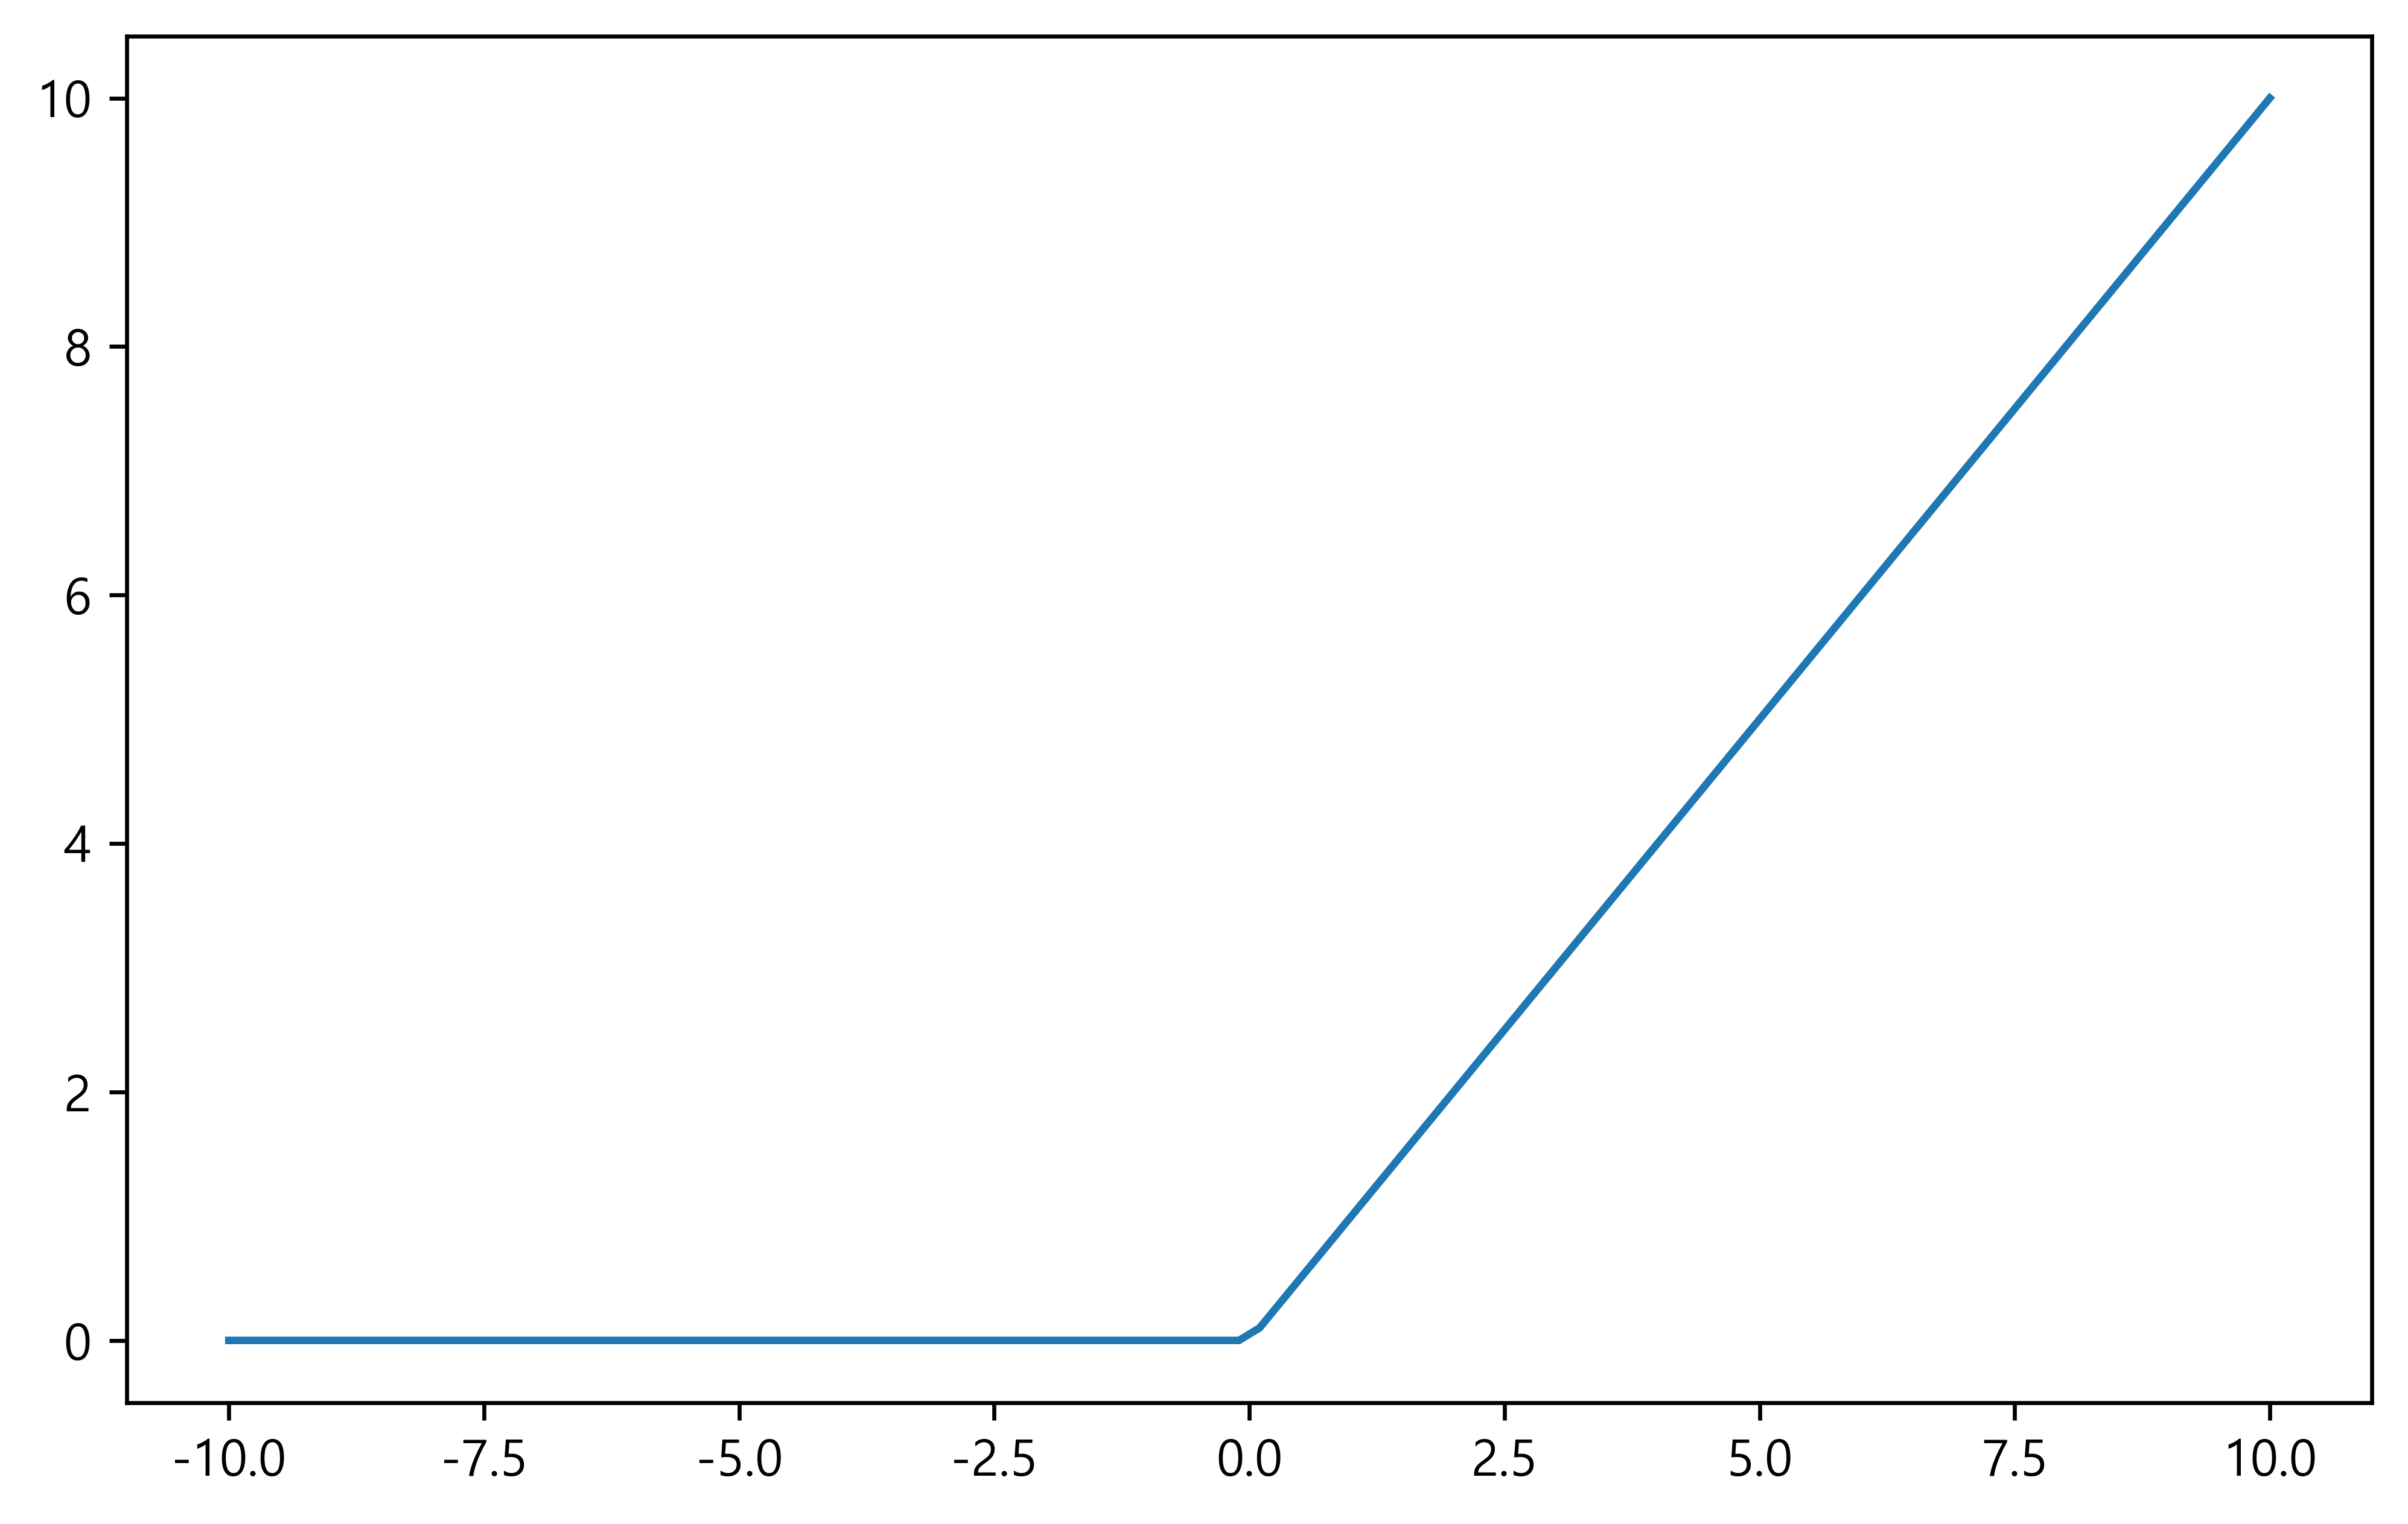

In [40]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))
plt.show()

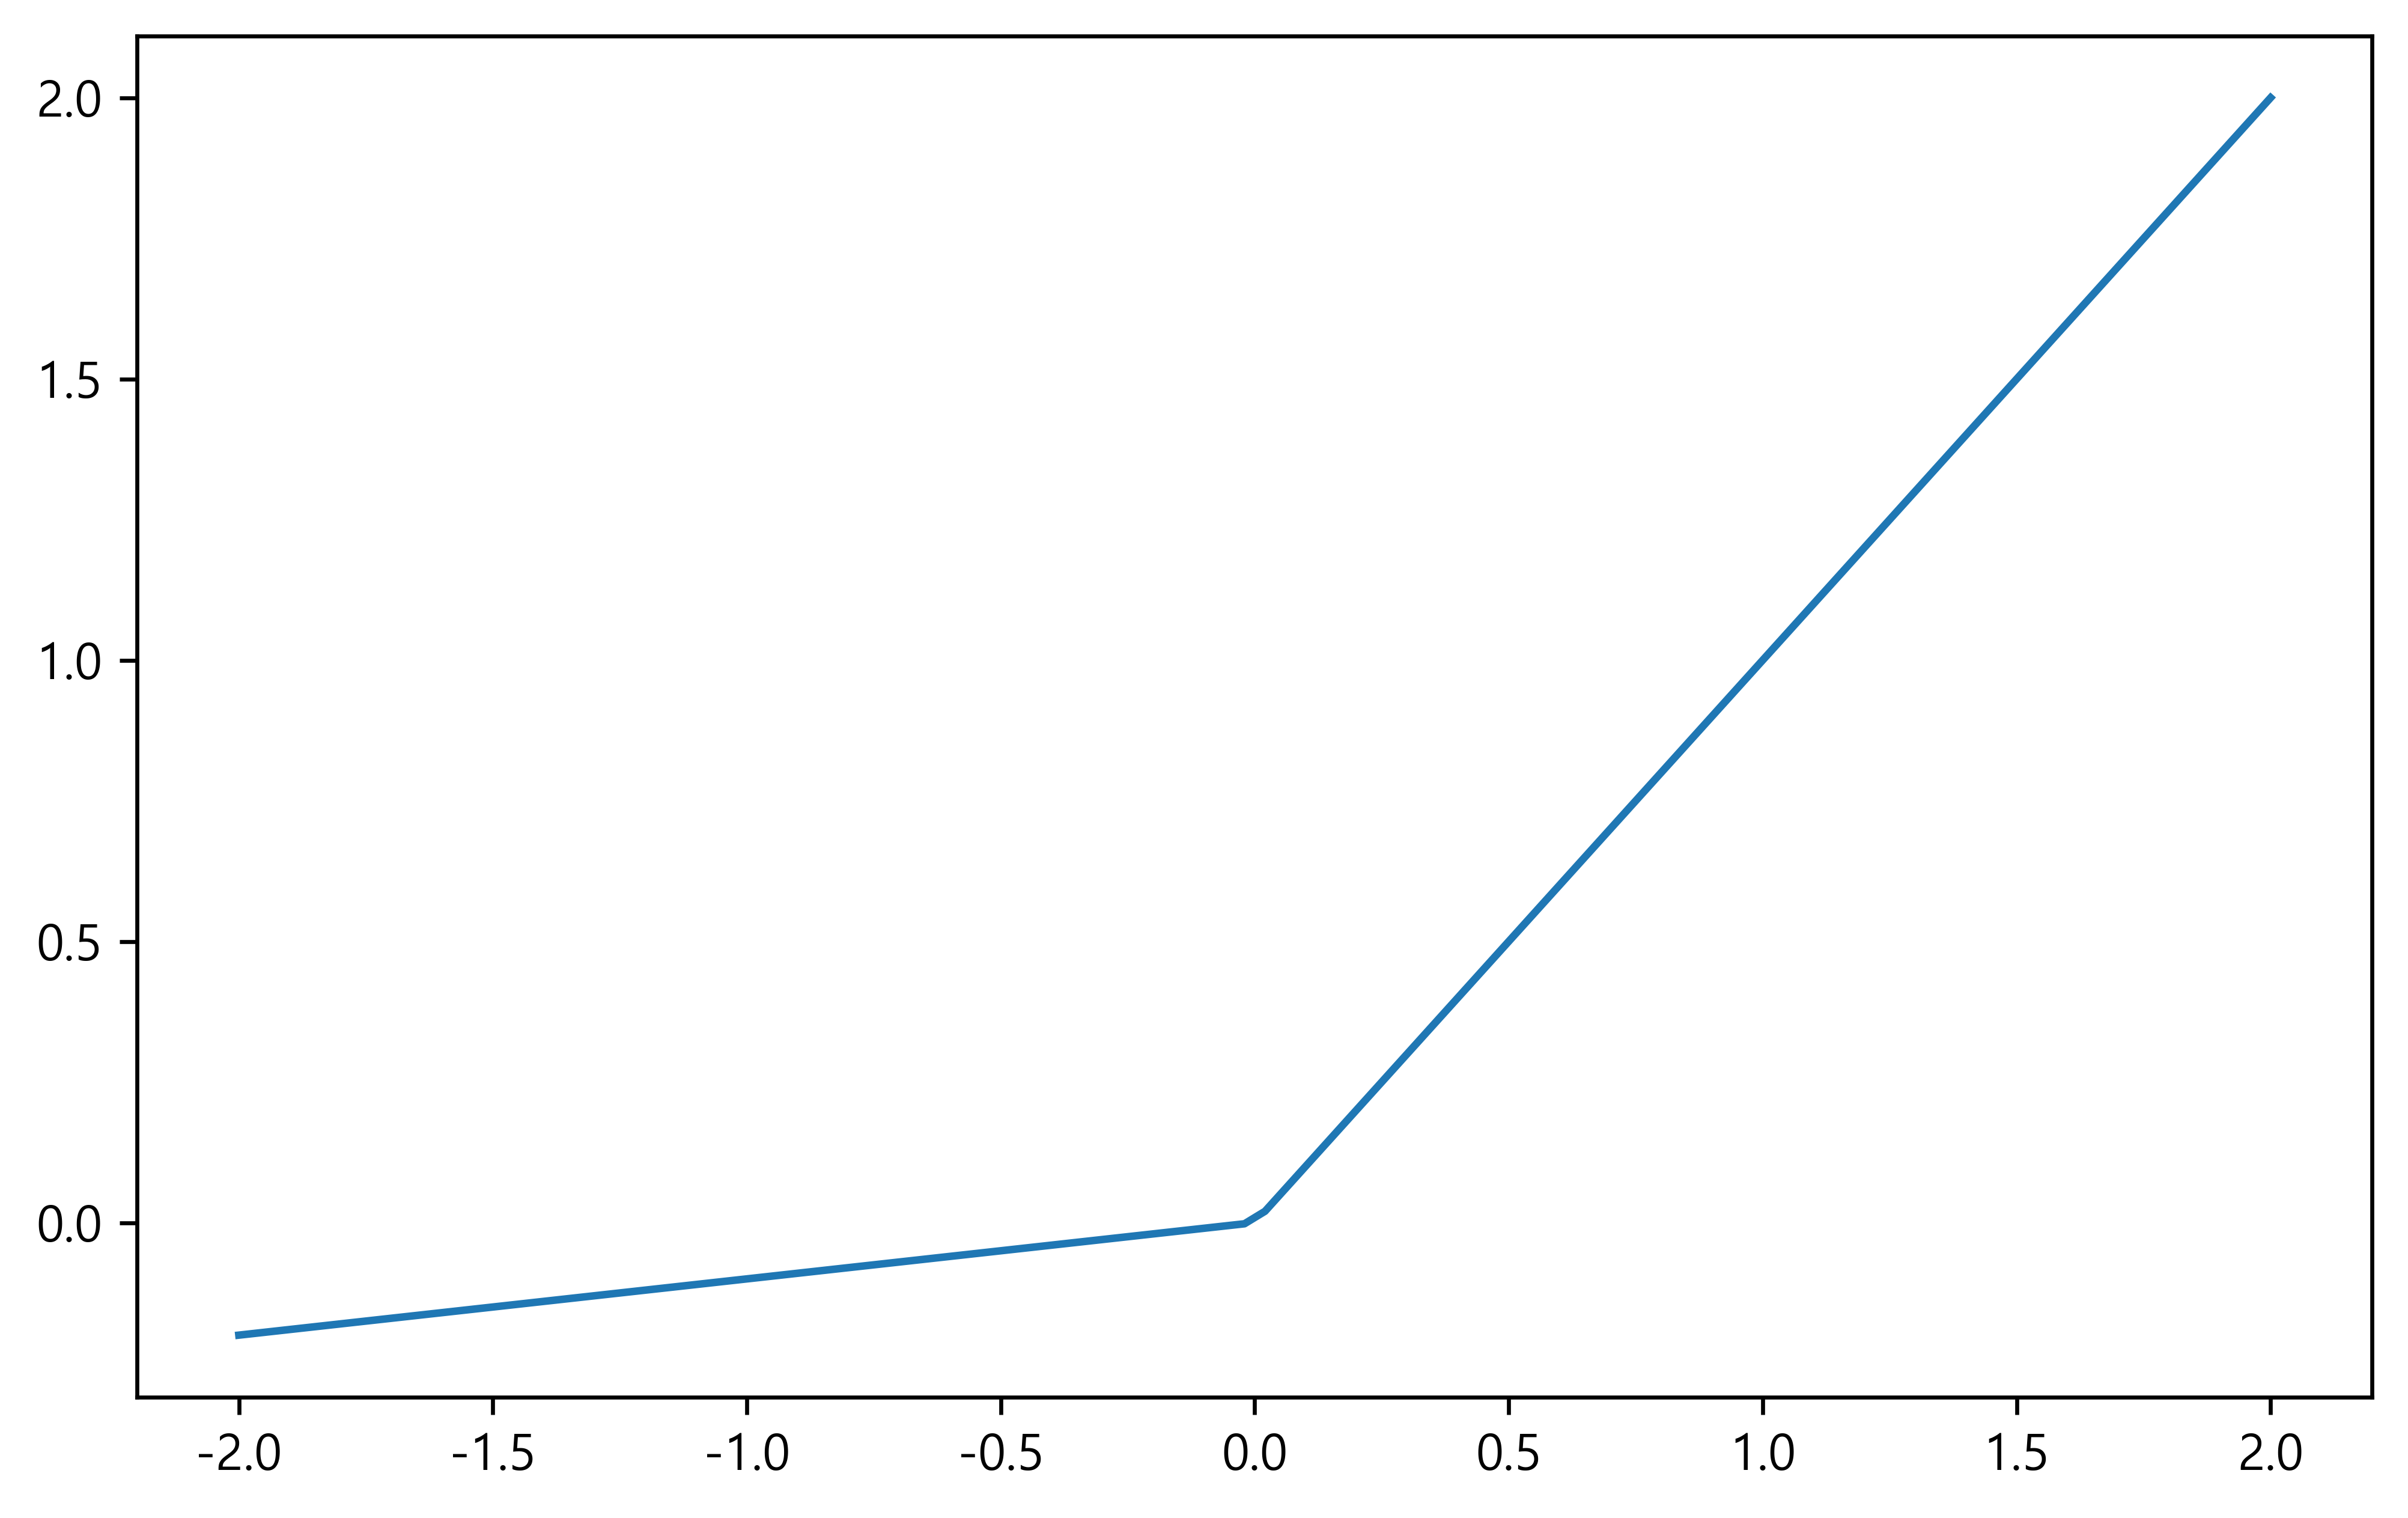

In [38]:
x = np.linspace(-2, 2, 100)
y = np.maximum(0.1 * x, x)
plt.plot(x, y)
plt.show()

In [ ]:
자코비안 헤시안

In [44]:
import sympy
sympy.init_printing(use_latex='mathjax')

In [46]:
x1, x2, x3 = sympy.symbols('x1 x2 x3')

In [48]:
f = (1 - x1)**2 + (1 - x2)**2 + 100 * ((x2 - x1**2)+(x3 - x2**2)**2)

In [49]:
f

                                                             2
        2                    2           2       ⎛    2     ⎞ 
- 100⋅x₁  + 100⋅x₂ + (1 - x₁)  + (1 - x₂)  + 100⋅⎝- x₂  + x₃⎠ 

In [50]:
sympy.diff(f, x1)

-198⋅x₁ - 2

In [51]:
sympy.diff(f, x2)

         ⎛    2     ⎞            
- 400⋅x₂⋅⎝- x₂  + x₃⎠ + 2⋅x₂ + 98

In [53]:
sympy.diff(f, x3)

        2         
- 200⋅x₂  + 200⋅x₃

In [57]:
sympy.diff(f, x1, x1)

-198

In [58]:
sympy.diff(f, x2, x2)

  ⎛      2             ⎞
2⋅⎝600⋅x₂  - 200⋅x₃ + 1⎠

In [56]:
sympy.diff(f, x3, x3)

200

In [114]:
def fp(x):
    return np.array([[sympy.diff(f, x1)],[sympy.diff(f, x2)],[sympy.diff(f, x3)]])

In [116]:
x = sympy.symbols('x')

f = sympy.exp(-x)
f

 -x
ℯ  

In [118]:
F = sympy.integrate(f)

In [120]:
(F.subs(x, np.inf) - F.subs(x, 0)).evalf()

1.00000000000000

In [ ]:
최적화

In [121]:
x1, x2, x3 = sympy.symbols('x1 x2 x3')
f = (1 - x1)**2 + (1 - x2)**2 + 100 * ((x2 - x1**2)+(x3 - x2**2)**2)
f

                                                             2
        2                    2           2       ⎛    2     ⎞ 
- 100⋅x₁  + 100⋅x₂ + (1 - x₁)  + (1 - x₂)  + 100⋅⎝- x₂  + x₃⎠ 

In [122]:
def f(x):
    return (1 - x[0])**2 + (1 - x[1])**2 + 100 * ((x[1] - x[0]**2)+(x[2] - x[1]**2)**2)

In [123]:
x0 = (0, 0, 0)

result = scipy.optimize.minimize(f, x0)

result

      fun: -4.687760435923229e+17
 hess_inv: array([[ 9.91333021e-02, -1.98058848e-06, -1.85210060e-02],
       [-1.98058848e-06,  4.46573551e-11,  3.13046015e-07],
       [-1.85210060e-02,  3.13046015e-07,  4.21192148e-03]])
      jac: array([-1.28849019e+10, -2.24429221e+14, -1.71798692e+10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 621
      nit: 57
     njev: 122
   status: 2
  success: False
        x: array([ 8.08138101e+07, -1.33065378e+04,  1.34899949e+08])

In [ ]:
fp = 

In [115]:
result = scipy.optimize.minimize(f, x0, jac=fp)
result

SympifyError: Sympify of expression 'could not parse '<function f at 0x0000022BD9BD5C18>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

```
arg max xy
x**2 + y**2 <= 1
y >= 0
```

In [128]:
def f(x):
    return x[0]*x[1]

def c(x):
    return 1 - ([0]**2 + x[1]**2)

scipy.optimize.fmin_slsqp(f, np.array[0,0], ieqcons=[c])

TypeError: 'builtin_function_or_method' object is not subscriptable